In [18]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

In [19]:
root = Path("nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/")

In [20]:
list(root.parts)

['nifti',
 'FDG-PET-CT-Lesions',
 'PETCT_0011f3deaf',
 '03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445']

In [21]:
list(root.glob("*"))

[WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CT.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CTres.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/PET.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SEG.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SUV.nii.gz')]

In [22]:
PatientCT_Path = list(root.glob("CT*"))[0] 
PatientCTRes_Path = list(root.glob("CTres*"))[0] 
PatientPET_Path = list(root.glob("PET*"))[0] 
PatientSEG_Path = list(root.glob("SEG*"))[0] 
PatientSUV_Path = list(root.glob("SUV*"))[0] 

In [23]:
data = nib.load(PatientCT_Path)
ct = data.get_fdata()
data = nib.load(PatientCTRes_Path)
ctres = data.get_fdata()
data = nib.load(PatientPET_Path)
pet = data.get_fdata()
data = nib.load(PatientSEG_Path)
seg = data.get_fdata()
data = nib.load(PatientSUV_Path)
suv = data.get_fdata()

In [24]:
print("Shape:", ct.shape)
print("Data type:", ct.dtype)

Shape: (512, 512, 391)
Data type: float64


In [25]:
print("CT Shape:", ct.shape)
print("ctres Shape:", ctres.shape)
print("pet Shape:", pet.shape)
print("seg Shape:", seg.shape)
print("suv Shape:", suv.shape)

CT Shape: (512, 512, 391)
ctres Shape: (400, 400, 326)
pet Shape: (400, 400, 326)
seg Shape: (400, 400, 326)
suv Shape: (400, 400, 326)


<IPython.core.display.Javascript object>


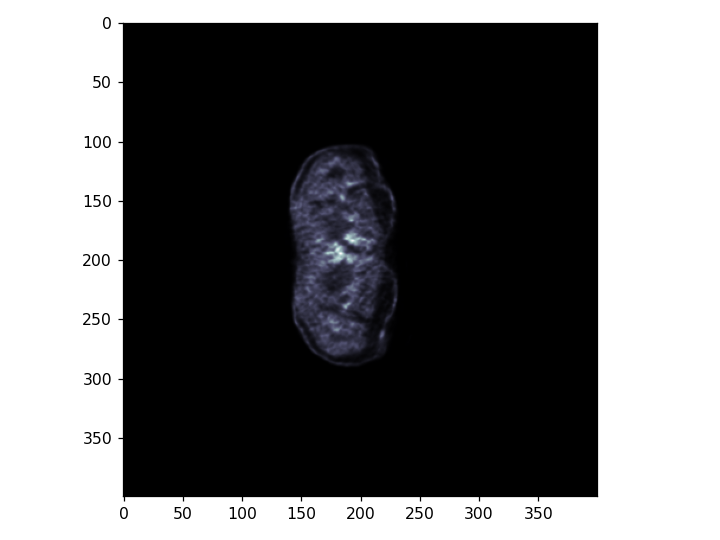

In [26]:
fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(pet.shape[2]):  # Axial view
    plt.imshow(pet[:,:,i], cmap="bone")
    mask_ = np.ma.masked_where(seg[:,:,i]==0, seg[:,:,i])
    plt.imshow(mask_, alpha=0.5)
    # plt.axis("off")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation


In [27]:
HTML(animation.to_html5_video())

C:\Users\jagdi\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\jagdi\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


<IPython.core.display.Javascript object>


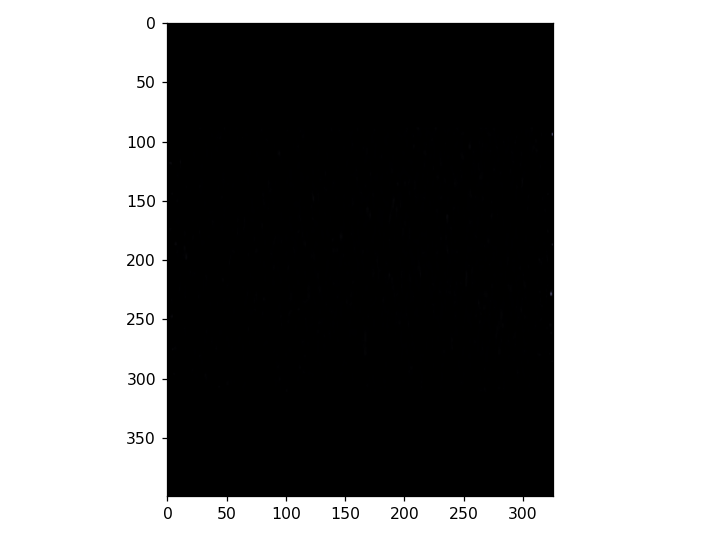

In [28]:
fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(pet.shape[1]):  # Axial view
    plt.imshow(pet[:,i,:], cmap="bone")
    mask_ = np.ma.masked_where(seg[:,i,:]==0, seg[:,i,:])
    plt.imshow(mask_, alpha=0.5)
    # plt.axis("off")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation


In [29]:
HTML(animation.to_html5_video())

C:\Users\jagdi\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\jagdi\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


<IPython.core.display.Javascript object>


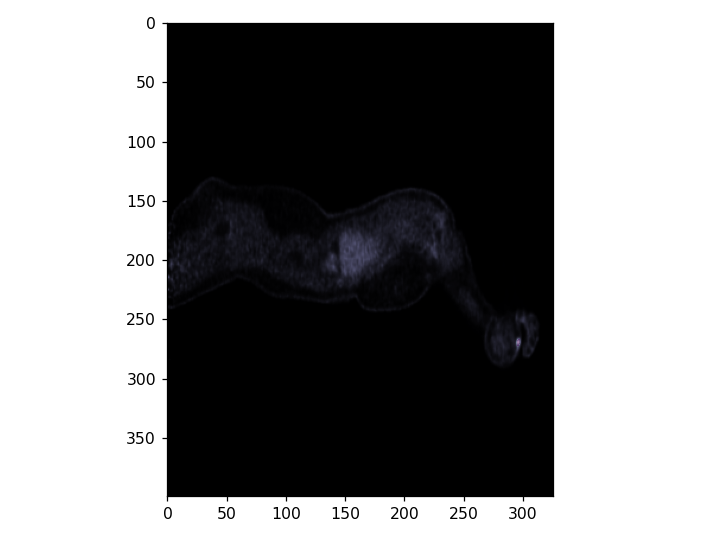

In [30]:
fig = plt.figure()
camera = Camera(fig)  # Create the camera object from celluloid

for i in range(pet.shape[0]):  # Axial view
    plt.imshow(pet[i,:,:], cmap="bone")
    mask_ = np.ma.masked_where(seg[i,:,:]==0, seg[i,:,:])
    plt.imshow(mask_, alpha=0.5)
    # plt.axis("off")
    camera.snap()  # Store the current slice
plt.tight_layout()
animation = camera.animate()  # Create the animation


In [31]:
HTML(animation.to_html5_video())

C:\Users\jagdi\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\jagdi\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


In [17]:
plt.imshow(pet[:, :, 71], cmap='gray')
plt.colorbar()
plt.show()